# Planets example

In [15]:
import pandas as pd
import numpy as np

In [1]:
import seaborn as sns
planets = sns.load_dataset("planets")
# planets.shape
planets.head()


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [2]:
# eda
planets.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [3]:
planets.shape

(1035, 6)

In [4]:
planets.describe() # automatically drops strings!


,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [5]:
planets.isnull().sum()


method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [6]:
# try to rename a column
planets = planets.rename(columns = {'mass': 'Mass'})

In [7]:
# planets.head()
planets['Mass'].round(1)

0        7.1
1        2.2
2        2.6
3       19.4
4       10.5
        ... 
1030     NaN
1031     NaN
1032     NaN
1033     NaN
1034     NaN
Name: Mass, Length: 1035, dtype: float64

In [8]:
planets['Mass'].astype(str).head(3) # only show the first 3


0     7.1
1    2.21
2     2.6
Name: Mass, dtype: object

In [9]:
planets['method'].unique()


array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [10]:
planets['method'].value_counts()


method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

In [11]:
# subsetting
planets[['method', 'Mass']]

,method,Mass
0,Radial Velocity,7.10
1,Radial Velocity,2.21
2,Radial Velocity,2.60
3,Radial Velocity,19.40
4,Radial Velocity,10.50
...,...,...
1030,Transit,NaN
1031,Transit,NaN
1032,Transit,NaN
1033,Transit,NaN


In [12]:
# filtering
planets[planets['Mass']>19]

,method,number,orbital_period,Mass,distance,year
3,Radial Velocity,1,326.03,19.40,110.62,2007
63,Radial Velocity,1,305.50,20.60,92.51,2013
85,Radial Velocity,2,379.63,21.42,NaN,2009
321,Radial Velocity,1,2371.00,25.00,37.05,2008
913,Radial Velocity,1,677.80,19.80,NaN,2007


In [13]:
planet_sub = planets.copy()[planets['Mass']>15]
planet_sub

,method,number,orbital_period,Mass,distance,year
3,Radial Velocity,1,326.0300,19.40,110.62,2007
63,Radial Velocity,1,305.5000,20.60,92.51,2013
85,Radial Velocity,2,379.6300,21.42,NaN,2009
161,Radial Velocity,2,428.5000,15.20,214.00,2009
317,Radial Velocity,1,1.3283,18.37,43.03,2003
321,Radial Velocity,1,2371.0000,25.00,37.05,2008
462,Radial Velocity,1,1951.0000,18.15,57.21,2008
492,Radial Velocity,1,2.3910,15.50,76.51,2009
527,Radial Velocity,2,1749.5000,18.10,37.88,2000
575,Radial Velocity,2,255.8700,17.40,46.34,2002


In [17]:
planet_sub['pre2005'] = np.where(planet_sub['year']<2005, 'yes', 'no')
planet_sub

,method,number,orbital_period,Mass,distance,year,pre2005
3,Radial Velocity,1,326.0300,19.40,110.62,2007,no
63,Radial Velocity,1,305.5000,20.60,92.51,2013,no
85,Radial Velocity,2,379.6300,21.42,NaN,2009,no
161,Radial Velocity,2,428.5000,15.20,214.00,2009,no
317,Radial Velocity,1,1.3283,18.37,43.03,2003,yes
321,Radial Velocity,1,2371.0000,25.00,37.05,2008,no
462,Radial Velocity,1,1951.0000,18.15,57.21,2008,no
492,Radial Velocity,1,2.3910,15.50,76.51,2009,no
527,Radial Velocity,2,1749.5000,18.10,37.88,2000,yes
575,Radial Velocity,2,255.8700,17.40,46.34,2002,yes


In [18]:
planet_sub.reset_index()


,index,method,number,orbital_period,Mass,distance,year,pre2005
0,3,Radial Velocity,1,326.0300,19.40,110.62,2007,no
1,63,Radial Velocity,1,305.5000,20.60,92.51,2013,no
2,85,Radial Velocity,2,379.6300,21.42,NaN,2009,no
3,161,Radial Velocity,2,428.5000,15.20,214.00,2009,no
4,317,Radial Velocity,1,1.3283,18.37,43.03,2003,yes
5,321,Radial Velocity,1,2371.0000,25.00,37.05,2008,no
6,462,Radial Velocity,1,1951.0000,18.15,57.21,2008,no
7,492,Radial Velocity,1,2.3910,15.50,76.51,2009,no
8,527,Radial Velocity,2,1749.5000,18.10,37.88,2000,yes
9,575,Radial Velocity,2,255.8700,17.40,46.34,2002,yes


In [19]:
# sort based on one value
planet_sub.sort_values('Mass', ascending=False)

,method,number,orbital_period,Mass,distance,year,pre2005
321,Radial Velocity,1,2371.0000,25.00,37.05,2008,no
85,Radial Velocity,2,379.6300,21.42,NaN,2009,no
63,Radial Velocity,1,305.5000,20.60,92.51,2013,no
913,Radial Velocity,1,677.8000,19.80,NaN,2007,no
3,Radial Velocity,1,326.0300,19.40,110.62,2007,no
317,Radial Velocity,1,1.3283,18.37,43.03,2003,yes
462,Radial Velocity,1,1951.0000,18.15,57.21,2008,no
527,Radial Velocity,2,1749.5000,18.10,37.88,2000,yes
575,Radial Velocity,2,255.8700,17.40,46.34,2002,yes
492,Radial Velocity,1,2.3910,15.50,76.51,2009,no


In [20]:
planet_sub.sort_values(by = ['orbital_period', 'Mass'], ascending=False)


,method,number,orbital_period,Mass,distance,year,pre2005
321,Radial Velocity,1,2371.0000,25.00,37.05,2008,no
462,Radial Velocity,1,1951.0000,18.15,57.21,2008,no
527,Radial Velocity,2,1749.5000,18.10,37.88,2000,yes
913,Radial Velocity,1,677.8000,19.80,NaN,2007,no
161,Radial Velocity,2,428.5000,15.20,214.00,2009,no
85,Radial Velocity,2,379.6300,21.42,NaN,2009,no
3,Radial Velocity,1,326.0300,19.40,110.62,2007,no
63,Radial Velocity,1,305.5000,20.60,92.51,2013,no
575,Radial Velocity,2,255.8700,17.40,46.34,2002,yes
492,Radial Velocity,1,2.3910,15.50,76.51,2009,no


In [21]:
planet_sub['mass_c'] = planet_sub['Mass'].transform(lambda x: x - x.mean())
planet_sub

,method,number,orbital_period,Mass,distance,year,pre2005,mass_c
3,Radial Velocity,1,326.0300,19.40,110.62,2007,no,0.405455
63,Radial Velocity,1,305.5000,20.60,92.51,2013,no,1.605455
85,Radial Velocity,2,379.6300,21.42,NaN,2009,no,2.425455
161,Radial Velocity,2,428.5000,15.20,214.00,2009,no,-3.794545
317,Radial Velocity,1,1.3283,18.37,43.03,2003,yes,-0.624545
321,Radial Velocity,1,2371.0000,25.00,37.05,2008,no,6.005455
462,Radial Velocity,1,1951.0000,18.15,57.21,2008,no,-0.844545
492,Radial Velocity,1,2.3910,15.50,76.51,2009,no,-3.494545
527,Radial Velocity,2,1749.5000,18.10,37.88,2000,yes,-0.894545
575,Radial Velocity,2,255.8700,17.40,46.34,2002,yes,-1.594545


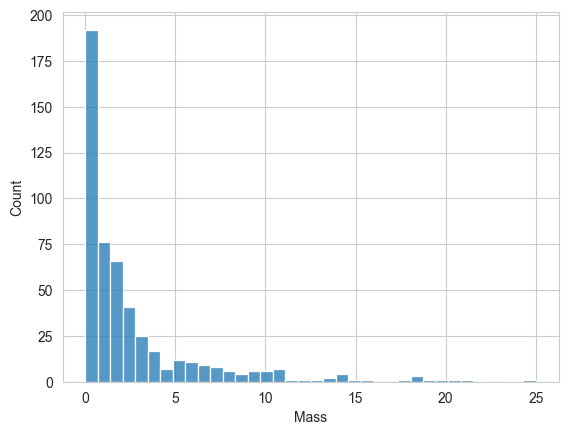

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(planets['Mass'])
plt.show()

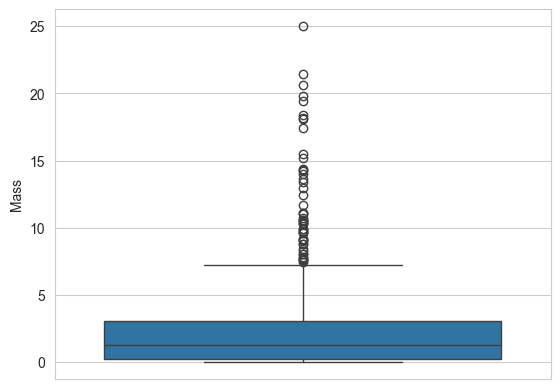

In [23]:
sns.boxplot(planets['Mass'])
plt.show()

<Axes: xlabel='count', ylabel='method'>

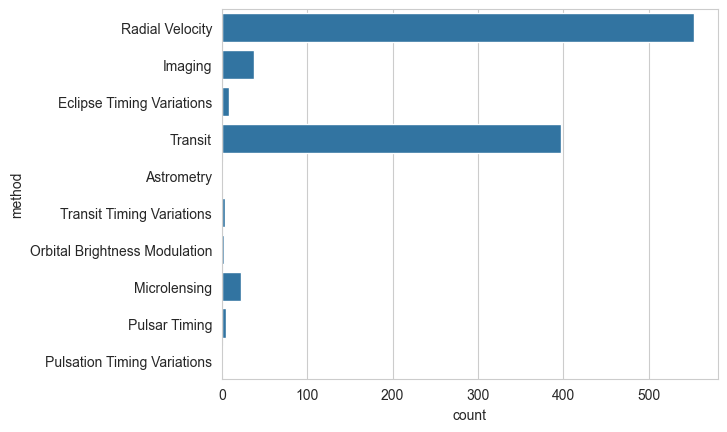

In [24]:
sns.countplot(planets['method'])
plt.show()

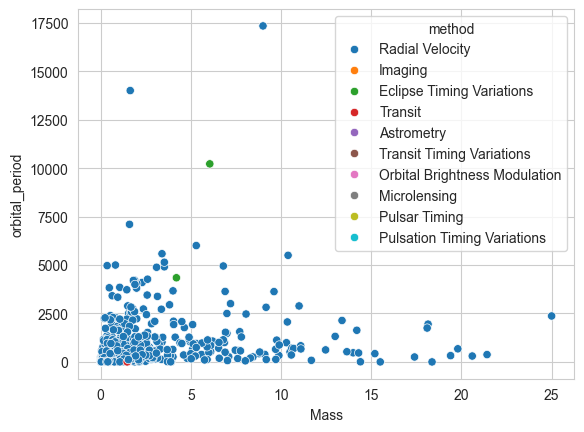

In [25]:
sns.scatterplot(x = 'Mass', y = 'orbital_period', hue = 'method', data = planets)
plt.show()

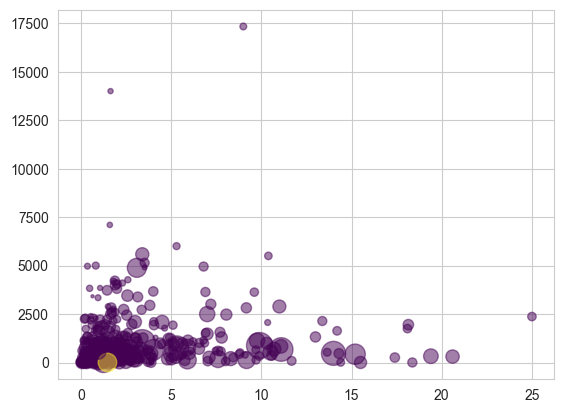

In [33]:
planets['method_code'] = pd.Categorical(planets['method']).codes

plt.scatter(planets['Mass'],
            planets['orbital_period'],
            alpha=0.5,
            s=planets['distance'],
            c=planets['method_code'],
            cmap = 'viridis')
# plt.xlabel(iris.feature_names[0])
# plt.ylabel(iris.feature_names[1]);

In [29]:
planets['method_code'].unique()

array([7, 2, 1, 8, 0, 9, 4, 3, 5, 6], dtype=int8)